In [1]:
%pylab --no-import-all notebook
import sys 
sys.path.append("../modules")

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from copy import copy
import warnings
warnings.filterwarnings('ignore')
import Datasets as dat
import Feature_Engineering as FE
import Pipeline_Methods as PM
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [3]:
import os 
path = os.getcwd()
path = path.replace(path.split('/')[-1],'')

In [4]:
valid_path = path + "Tabulky a výsledky/"

In [24]:
f = pd.read_hdf(valid_path + 'Results_4stavy_SVC.h5','First_dataset')
s = pd.read_hdf(valid_path + 'Results_4stavy_SVC.h5','Second_dataset')

## V tomoto notebooku jsou moje poznámky a výsedky hledání nejlepších parametrů pro SVC - Support Vector Classifier

Protože jsem nevěděl jaké parametry svm by mohly být vhodné, použil jsem GridSearch, kterou jsem trochu upravil aby vyhovovala mým potřebám. (Standartní GridSearchCV z sklearnu provává split na křížovou validaci jinak, než bych to potřeboval. Já to potřebuju splitovat na jednotlivý signály a nevěděl jsem jak k tomu GridSearchCV přimět.)

Snažím se najít nejlepší kombinaci parametrů __kernel, gamma, C__, kde kernel je jádrová fce $K(x,y)$ sloužící k výpočtu skalárního součinu v prostoru s vysokou dimenzí, C je penalizační parametr, gamma ($\gamma$) je koeficient kernelu.

Typy kernelů:
- polynom stupně d 
    \begin{equation}
    K(\vec{x},\vec{y}) = (\gamma (\vec{x} \cdot \vec{y}) + r)^d
    \end{equation}
- radiálně bázové (bazické) funkce
    \begin{equation}
    K(\vec{x},\vec{y}) = \exp{(-\gamma  \Vert\vec{x} - \vec{y}\Vert  ^2 )}
    \end{equation}
- sigmoid
    \begin{equation}
    K(\vec{x},\vec{y}) = \tanh(\gamma (\vec{x} \cdot \vec{y}) + r)
    \end{equation}
- lineární 
    \begin{equation}
    K(\vec{x},\vec{y}) = \vec{x} \cdot \vec{y}
    \end{equation}

Já jsem při hledání zatím používal jen __rbf, sigmoid a linérní__ jádrové fce. Pro SVC jsem ještě neprováděl výběr příznaků, proto v tabulkách níže jsou jen výsledky se všemi příznaky.

Pro kernel __RBF__ jsem procházel síť parametrů
- 'gamma': [1e-1, 1e-2, 1e-3], 'C': [0.01, 0.1, 1, 10, 50, 100]

Pro kernel __sigmoid__ jsem procházel síť
- 'gamma': [1e-1, 1e-2, 1e-3], 'C': [0.01, 0.1, 1, 10, 50, 100]

Pro __lineární__ kernel jsem procházel je 
- 'C': [0.001, 0.01, 0.1, 1, 10, 50, 100]


## První dataset

In [6]:
f.sort_values([('F míra', 'průměrná')], ascending=False).head()

Metrika                                                                                                                                  Accuracy  \
Režim                                                                                                                                               
Kernel gamma C   H-alpha 1.d SGF 2.d SGF MM                        EMM                       MVar                                                   
rbf    0.1   100 1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.907   
             50  1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.908   
             10  1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.906   
linear NaN   100 1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.905   
             50  1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.905   

Metrika                                                                                                                                  F míra  \
Režim                                                                                                                                     H-mód   
Kernel gamma C   H-alpha 1.d SGF 2.d SGF MM                        EMM                       MVar                                                 
rbf    0.1   100 1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.927   
             50  1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.928   
             10  1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.927   
linear NaN   100 1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.928   
             50  1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.928   

Metrika                                                                                                                                          \
Režim                                                                                                                                     L-mód   
Kernel gamma C   H-alpha 1.d SGF 2.d SGF MM                        EMM                       MVar                                                 
rbf    0.1   100 1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.923   
             50  1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.923   
             10  1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.921   
linear NaN   100 1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.919   
             50  1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.919   

Metrika                                                                                                                                             \
Režim                                                                                                                                    ELM start   
Kernel gamma C   H-alpha 1.d SGF 2.d SGF MM                        EMM                       MVar                                                    
rbf

Podle výsledků jsou nejlepší parametry pro SVC __kernel = 'rbf', gamma = 0.1 a C = 100__.

S těmito parametry jsem dosáhl průměrné F-míry __0.898 $\pm$ 0.023__ . Maximální doposud dosažená průměrná F-míra byla __0.894 $\pm$ 0.029__, kterou jsme získaly pomocí GradientBoostingClassifier se 100 stromy, learning ratem 0.1 a výběrem pěti nejlepších příznaků. 

## "vizualizace" výsledků SVC

In [19]:
Data = dat.load_dataset('first_dataset_mod')
df = FE.Features.all_features().CreateDataFrame(Data=Data)
X_train, y_train, X_test, y_test = FE.KFold(Data.shape[2]).fit_transform(x=df, kFoldIndex=9)

model = SVC(kernel = 'rbf', C = 50, gamma = 0.1)
model.fit(X_train, y_train)
states = model.predict(X_test)

In [20]:
f1_score(y_test, states, average='macro')

0.8968225109927824

<IPython.core.display.Javascript object>


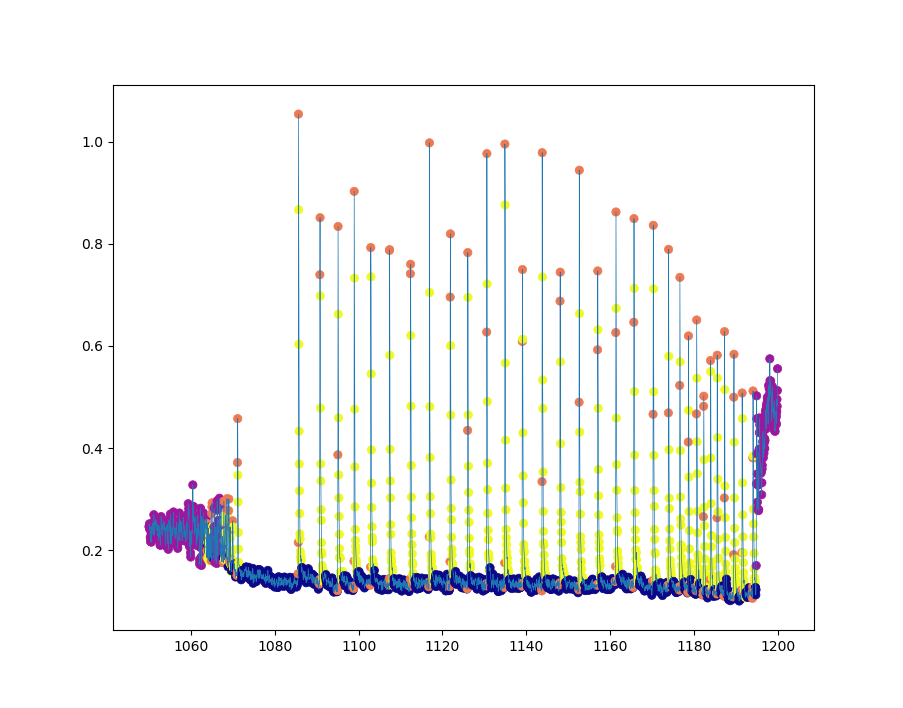

In [22]:
plt.figure('Original')
plt.plot(Data.time[9], Data.H_alpha[9], lw=0.5)
plt.scatter(Data.time[9], Data.H_alpha[9], c=Data.labels[9], cmap = plt.cm.plasma, lw=0.5)
plt.show()

<IPython.core.display.Javascript object>


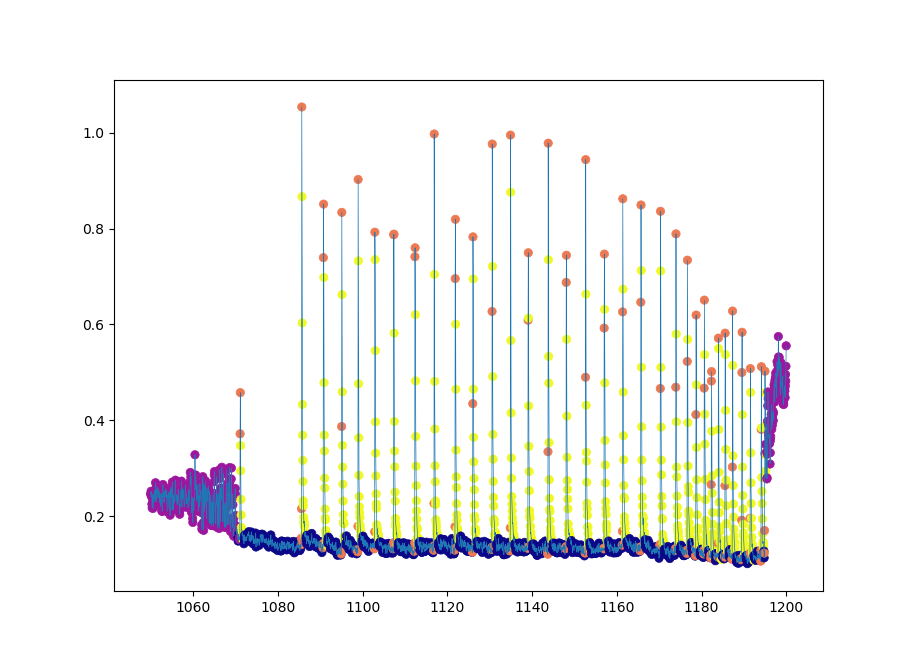

In [21]:
plt.figure('Best parameters')
plt.plot(Data.time[9], Data.H_alpha[9], lw=0.5)
plt.scatter(Data.time[9], Data.H_alpha[9], c=states, cmap = plt.cm.plasma, lw=0.5)
plt.show()

<IPython.core.display.Javascript object>


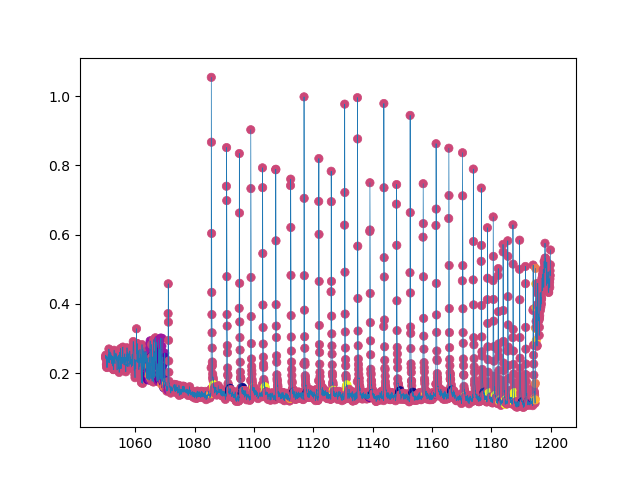

In [23]:
plt.figure('Rozdíly predikce a labelů')
plt.plot(Data.time[9], Data.H_alpha[9], lw=0.5)
plt.scatter(Data.time[9], Data.H_alpha[9], c=(states - y_test), cmap = plt.cm.plasma, lw=0.5)
plt.show()

Z obrázků je patrné, že se predikované stavy od originálních labelů téměnř neliší. Model chybně označuje stavy především na přechodech mezi ELM_end (konci ELMů) a H-módem. Špatně označená místa jsou nepřehledná i pro mě. Sám nedokážu říct jestli realitě odpovídají spíše predikované stavy nebo labely.

## Druhá dataset

In [25]:
s.sort_values([('F míra', 'průměrná')], ascending=False).head()

Metrika                                                                                                                                  Accuracy  \
Režim                                                                                                                                               
Kernel gamma C   H-alpha 1.d SGF 2.d SGF MM                        EMM                       MVar                                                   
rbf    0.1   100 1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.845   
             50  1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.844   
linear NaN   100 1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.838   
             50  1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.838   
rbf    0.1   10  1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.839   

Metrika                                                                                                                                  F míra  \
Režim                                                                                                                                     H-mód   
Kernel gamma C   H-alpha 1.d SGF 2.d SGF MM                        EMM                       MVar                                                 
rbf    0.1   100 1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.842   
             50  1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.841   
linear NaN   100 1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.836   
             50  1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.836   
rbf    0.1   10  1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.836   

Metrika                                                                                                                                          \
Režim                                                                                                                                     L-mód   
Kernel gamma C   H-alpha 1.d SGF 2.d SGF MM                        EMM                       MVar                                                 
rbf    0.1   100 1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.855   
             50  1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.856   
linear NaN   100 1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.851   
             50  1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.850   
rbf    0.1   10  1       1       1       [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.855   

Metrika                                                                                                                                             \
Režim                                                                                                                                    ELM start   
Kernel gamma C   H-alpha 1.d SGF 2.d SGF MM                        EMM                       MVar                                                    
rbf

U druhého datasetu je nejlepší kombinace stejná jako u prvního, tzn. __kernel = 'rbf', gamma = 0.1 a C = 100__.
Průměrná F-míra s těmito parametry je __0.795 $\pm$ 0.135__. Nejlepší výsledek dosažený boostovanými lesy pochází od __GB se 1000 stromy, learning ratem 0.01 a výběrem pěti nejlepších příznaků__ a je roven __0.794 $\pm$ 0.111__. Tento výseldek je sice "stejný" jako u SVC, ale má menší směrodanou odchylku. 

Navíc, vzhledem k výsledkům na prvním i druhém datasetu, to vypadá, že sigmoidální kernel je ze všech tří nejhorší a v budoucnu ho asi vynechám z dalších testů.